# Dados e Aprendizagem Automática
## Previsão eficiência do sono


**Dataset:** .csv

**Problema:** Prever eficiência do sono.
___
**Features do Dataset:**

* ID - identificador exclusivo para cada sujeito de teste
* Age - idade do sujeito
* Gender - Homem ou mulher
* Bedtime - hora em que o sujeito vai para a cama em cada a noite
* Wakeup time - hora em que o sujeito acorda em cada manhã
* Sleep duration - quantidade total de tempo que o sujeito dormiu (em horas)
* Sleep efficiency - medida da proporção de tempo na cama passado a dormir
* REM sleep percentage - percentagem do tempo total de sono gasto em sono REM
* Deep sleep percentage - percentagem do tempo total de sono gasto em sono profundo
* Light sleep percentage - percentagem do tempo total de sono gasto em sono leve
* Awakenings - número de vezes que o sujeito de teste acordou durante a noite
* Caffeine consumption - quantidade de cafeína consumida nas 24 horas antes de dormir (em mg)
* Alcohol consumption - quantidade de álcool consumida nas 24 horas antes de dormir (em oz)
* Smoking status - se o sujeito de teste fuma ou não
* Exercise frequency - número de vezes que o sujeito de teste faz exercícios por semana

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


## Importes e compreensão dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

In [2]:
df = pd.read_csv('./datasets/grupo/Sleep_Efficiency.csv')
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


Podemos verificar que este dataset é contem apenas 452 entradas para 15 atributos.

In [3]:
df.shape

(452, 15)

O dataset tem maioritariamente atributos numéricos,sendo os não numericos:
* Gender
* Bedtime
* Wakeup time
* Smoking status

É possivel ainda identificar a preseça de valores nulos em:
*  Awakenings
*  Caffeine consumption
*  Alcohol consumption
*  Exercise frequency

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


O objetivo de trabalhar com este dataset é identificar a eficiencia do sono, sendo a label um valor continuo compreendido entre 0 e 1.

## Preparação dos dados

### Missing data

<Axes: >

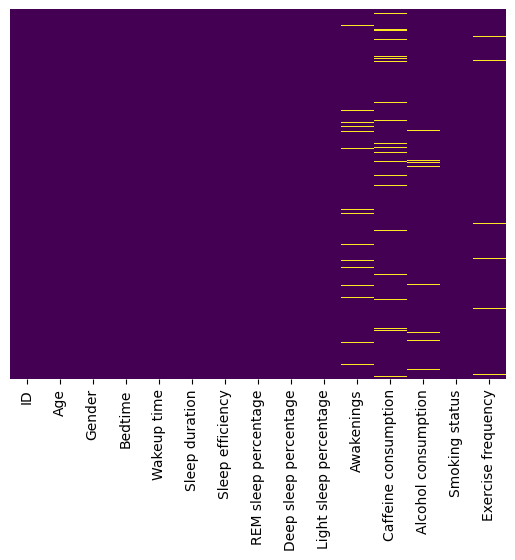

In [7]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

Função para preencher os valores nulos com 0.(Assumimos que a falta de valores corresponde à ausencia de consumo ou atividade)

In [8]:
def fill_with_zeros(data,columns,texto=False):
    data = df
    
    data[columns] = data[columns].fillna(0)
    
    return data

In [9]:
df=fill_with_zeros(df,['Awakenings','Caffeine consumption','Alcohol consumption','Exercise frequency'],True)

<Axes: >

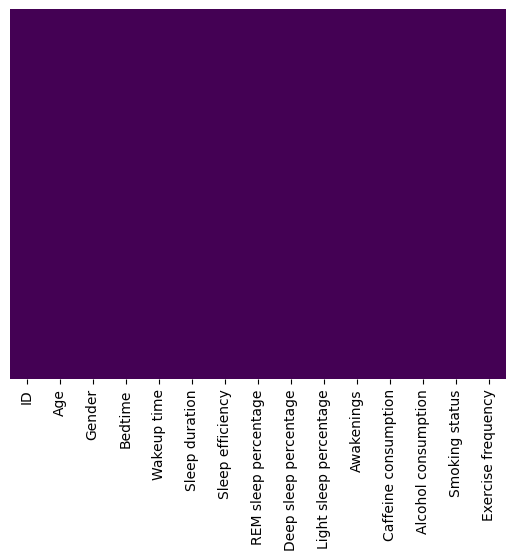

In [10]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Duplicados

In [11]:
df.duplicated().sum()

0

### Drop

In [12]:
df.drop(['ID'], axis = 1, inplace = True)

### Categoric data

Gender

In [13]:
'''
data_r3 = df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_r3['Gender'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()
'''
data_r3 = df.copy()
gender_mapper = {'Male':0, 'Female':1}
data_r3['Gender'] = data_r3['Gender'].replace(gender_mapper)
data_r3 = data_r3.join(pd.get_dummies(data_r3['Gender'], prefix='Gender').astype(int))
data_r3.rename(columns={'Gender_0':'Male','Gender_1':'Female'},inplace=True)
data_r3.drop(['Gender'], axis = 1, inplace = True)
data_r3.head()

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Male,Female
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,0,1
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1,0
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0,1
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0,1
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0


Smoking status

In [14]:
gender_mapper = {'No':0, 'Yes':1}
data_r3['Smoking status'] = data_r3['Smoking status'].replace(gender_mapper)
data_r3 = data_r3.join(pd.get_dummies(data_r3['Smoking status'], prefix='Smoking status').astype(int))
data_r3.rename(columns={'Smoking status_0':'No_Smoking','Smoking status_1':'Smoking'},inplace=True)
data_r3.drop(['Smoking status'], axis = 1, inplace = True)
data_r3.head()

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Male,Female,No_Smoking,Smoking
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1,0,1
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,0,0,1
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,1,1,0
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1,0,1
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,1,0


### Handling dates

In [15]:
data_r3['Bedtime'].head()

0    2021-03-06 01:00:00
1    2021-12-05 02:00:00
2    2021-05-25 21:30:00
3    2021-11-03 02:30:00
4    2021-03-13 01:00:00
Name: Bedtime, dtype: object

In [16]:
data_r3['Bedtime'] = pd.to_datetime(data_r3['Bedtime'], format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [17]:
assert data_r3['Bedtime'].isnull().sum() == 0, 'missing record date'

In [18]:
data_r3['Bedtime_year'] = data_r3['Bedtime'].dt.year
data_r3['Bedtime_month'] = data_r3['Bedtime'].dt.month
data_r3['Bedtime_day'] = data_r3['Bedtime'].dt.day
data_r3['Bedtime_hour'] = data_r3['Bedtime'].dt.hour
data_r3['Bedtime_minute'] = data_r3['Bedtime'].dt.minute

In [19]:
data_r3.drop(['Bedtime_year'], axis = 1, inplace = True)

In [20]:
#TODO retirar o dia da semana 
data_r3['Bedtime_Week_day'] = data_r3.Bedtime.dt.strftime("%A")

In [21]:
data_r3.drop(['Bedtime'], axis = 1, inplace = True)

In [22]:
print(data_r3['Bedtime_minute'].value_counts())

Bedtime_minute
0     291
30    161
Name: count, dtype: int64


In [23]:
data_r3['Wakeup time'] = pd.to_datetime(data_r3['Wakeup time'], format='%Y-%m-%d %H:%M:%S',errors='coerce')

assert data_r3['Wakeup time'].isnull().sum() == 0, 'missing record date'

data_r3['Wakeup_time_year'] = data_r3['Wakeup time'].dt.year
data_r3['Wakeup_time_month'] = data_r3['Wakeup time'].dt.month
data_r3['Wakeup_time_day'] = data_r3['Wakeup time'].dt.day
data_r3['Wakeup_time_hour'] = data_r3['Wakeup time'].dt.hour
data_r3['Wakeup_time_minute'] = data_r3['Wakeup time'].dt.minute

data_r3.drop(['Wakeup_time_year'], axis = 1, inplace = True)

In [24]:
data_r3['Wakeup_Week_day'] = data_r3['Wakeup time'].dt.strftime("%A")

In [25]:
data_r3.drop(['Wakeup time'], axis = 1, inplace = True)

In [26]:
data_r3.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,...,Bedtime_month,Bedtime_day,Bedtime_hour,Bedtime_minute,Bedtime_Week_day,Wakeup_time_month,Wakeup_time_day,Wakeup_time_hour,Wakeup_time_minute,Wakeup_Week_day
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,...,3,6,1,0,Saturday,3,6,7,0,Saturday
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,...,12,5,2,0,Sunday,12,5,9,0,Sunday
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,...,5,25,21,30,Tuesday,5,25,5,30,Tuesday
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,...,11,3,2,30,Wednesday,11,3,8,30,Wednesday
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,...,3,13,1,0,Saturday,3,13,9,0,Saturday


In [27]:
weekDay_mapper = {'Sunday' : 1,'Monday': 2, 'Tuesday': 3, 'Wednesday': 4 , 'Thursday' : 5 ,'Friday': 6 , 'Saturday' : 7}
data_r3['Bedtime_Week_day'] = data_r3["Bedtime_Week_day"].replace(weekDay_mapper)
data_r3['Wakeup_Week_day'] = data_r3["Wakeup_Week_day"].replace(weekDay_mapper)

In [28]:
data_r3.nunique()

Age                       61
Sleep duration             9
Sleep efficiency          50
REM sleep percentage      13
Deep sleep percentage     29
Light sleep percentage    29
Awakenings                 5
Caffeine consumption       6
Alcohol consumption        6
Exercise frequency         6
Male                       2
Female                     2
No_Smoking                 2
Smoking                    2
Bedtime_month             12
Bedtime_day               31
Bedtime_hour               6
Bedtime_minute             2
Bedtime_Week_day           7
Wakeup_time_month         12
Wakeup_time_day           31
Wakeup_time_hour          10
Wakeup_time_minute         2
Wakeup_Week_day            7
dtype: int64

## Exploraty Data Analysis

<Axes: >

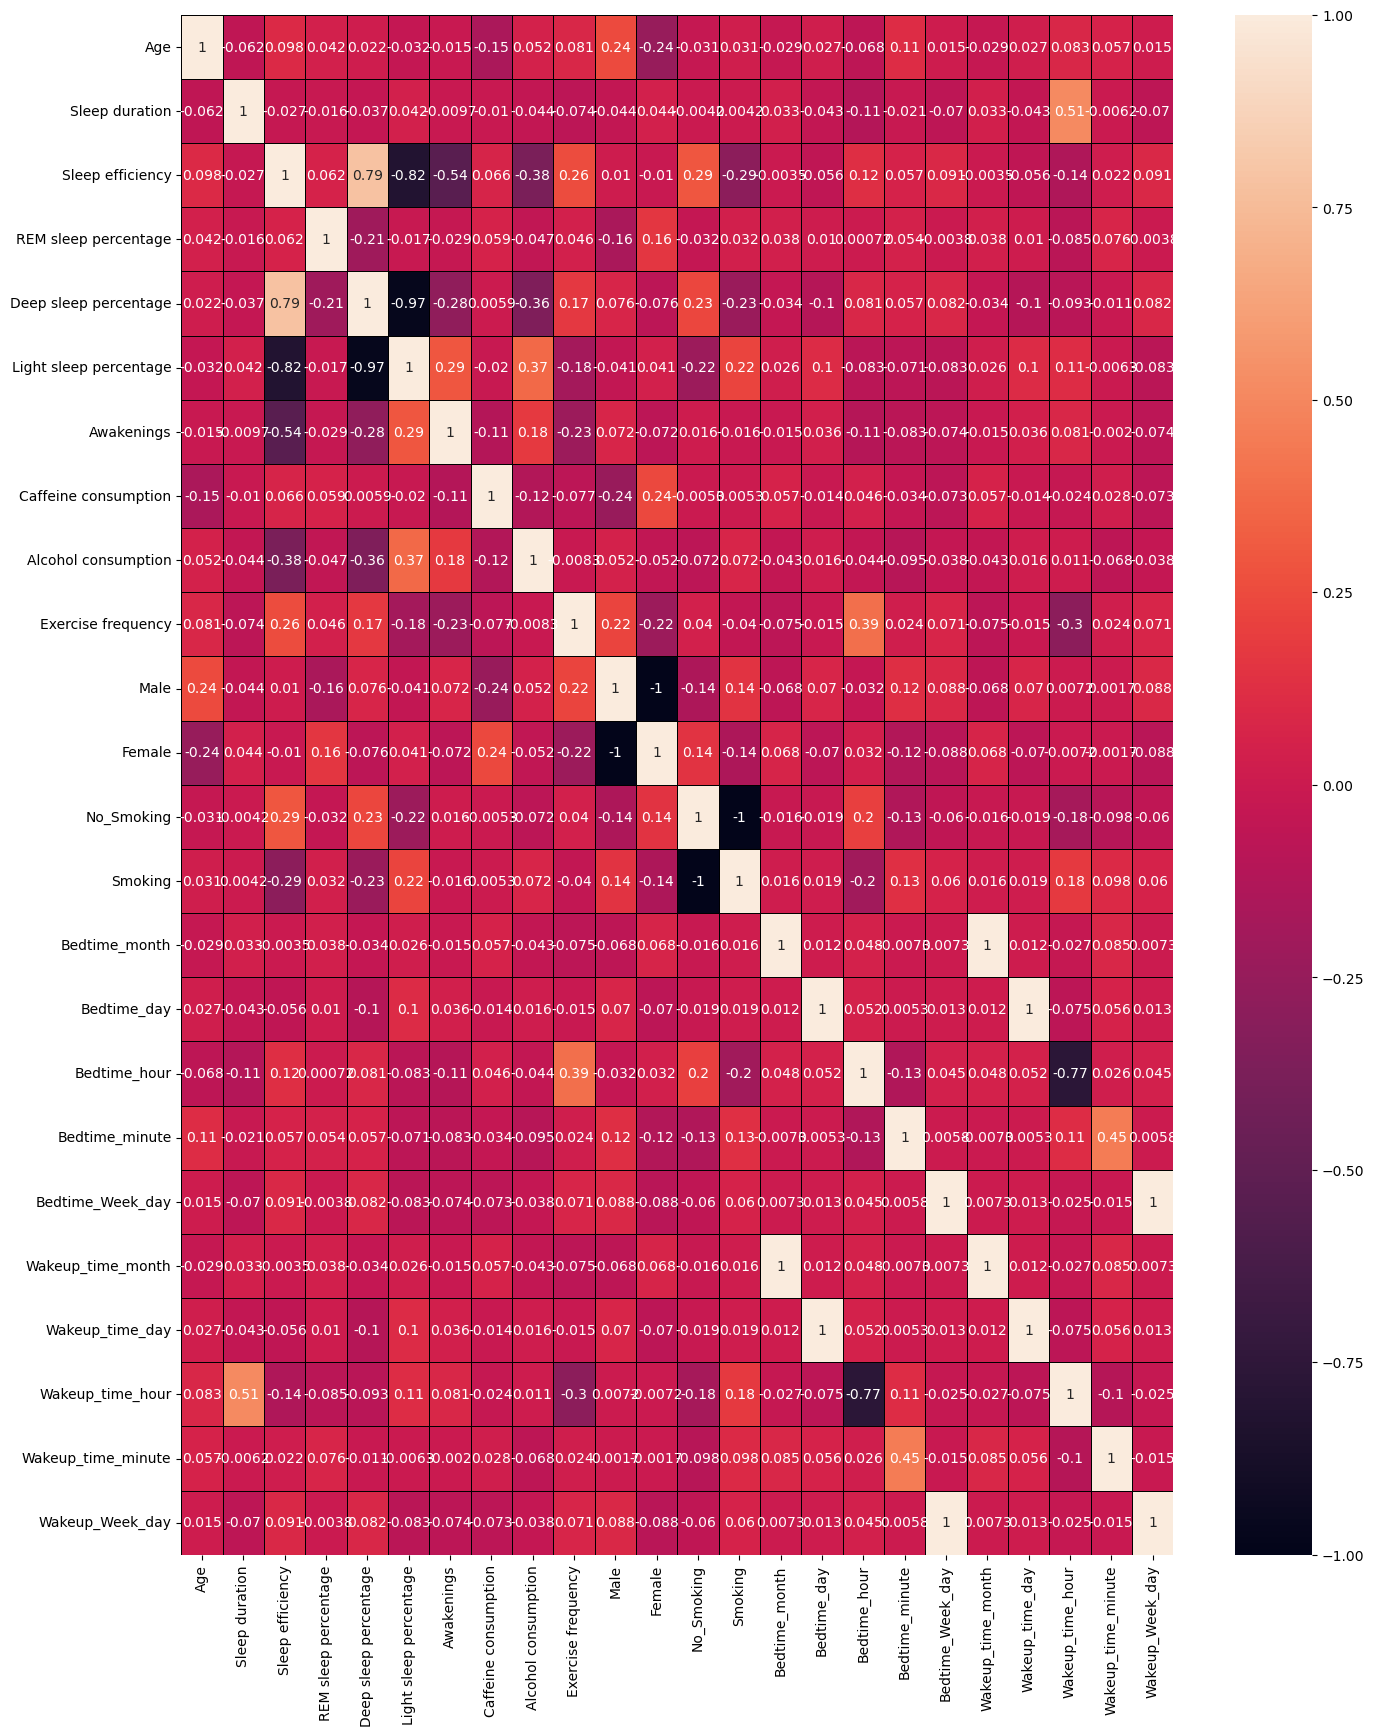

In [29]:
fig = plt.figure(figsize = (16,20))
incidents_corr = data_r3.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidth=0.5,annot=True)

In [30]:
data_r3.drop(['Wakeup_time_day','Wakeup_time_month','Wakeup_Week_day','Wakeup_time_hour'], axis = 1, inplace = True)

<Axes: >

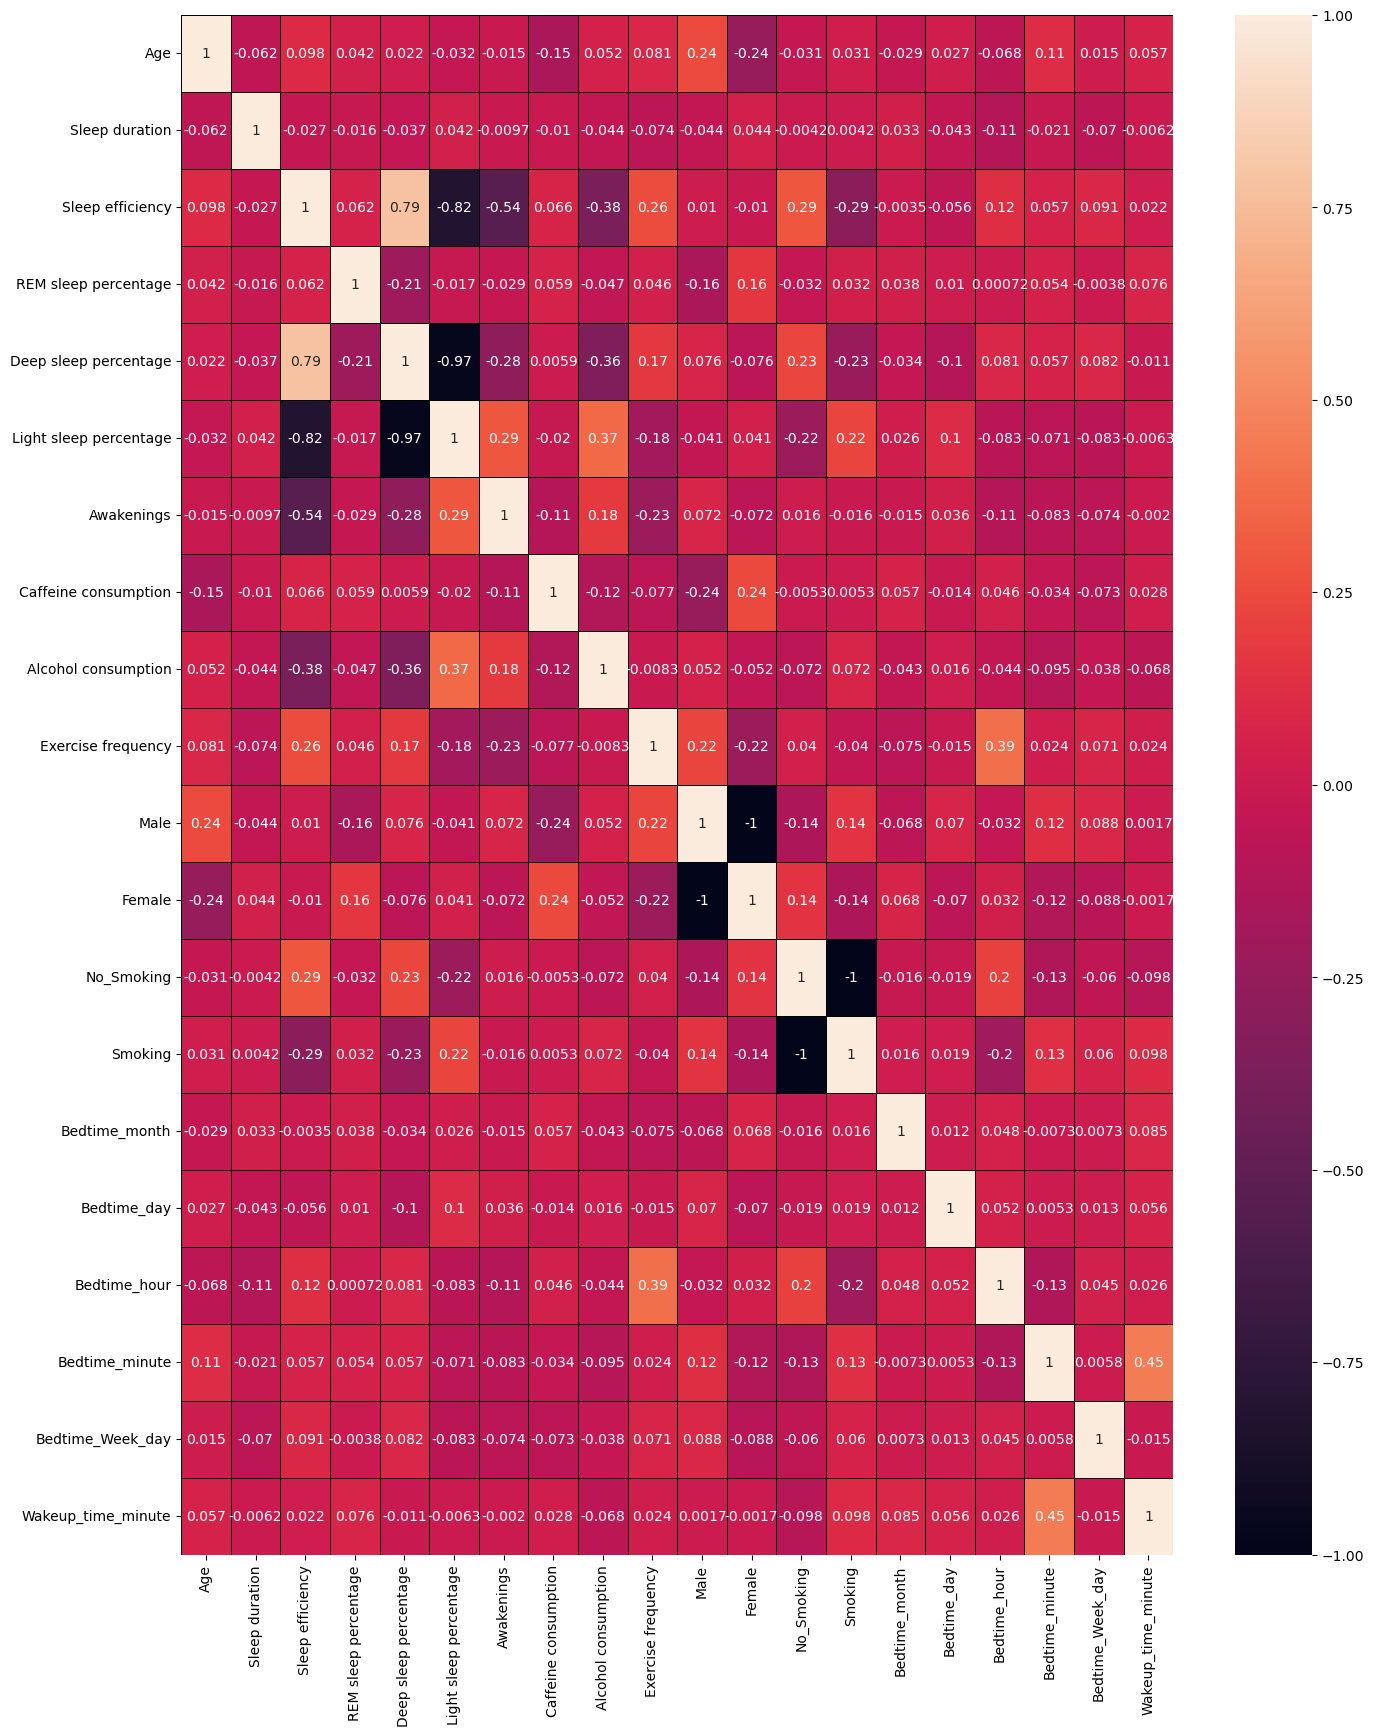

In [31]:
fig = plt.figure(figsize = (16,20))
incidents_corr = data_r3.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidth=0.5,annot=True)

In [32]:
#pair_plot=sns.pairplot(data_r3)
#pair_plot.savefig('pairplot.png')

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


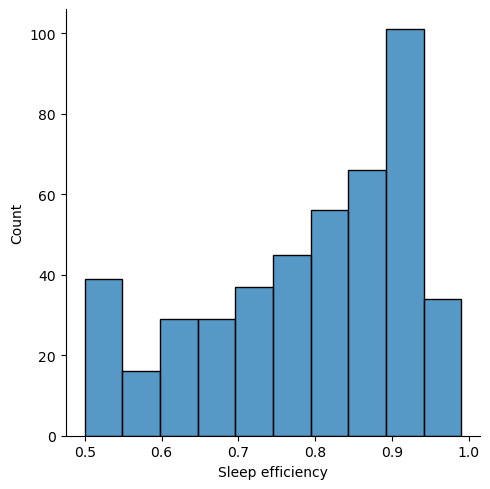

In [33]:
sns.displot(data_r3['Sleep efficiency'])

In [34]:
data_r3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Sleep duration          452 non-null    float64
 2   Sleep efficiency        452 non-null    float64
 3   REM sleep percentage    452 non-null    int64  
 4   Deep sleep percentage   452 non-null    int64  
 5   Light sleep percentage  452 non-null    int64  
 6   Awakenings              452 non-null    float64
 7   Caffeine consumption    452 non-null    float64
 8   Alcohol consumption     452 non-null    float64
 9   Exercise frequency      452 non-null    float64
 10  Male                    452 non-null    int64  
 11  Female                  452 non-null    int64  
 12  No_Smoking              452 non-null    int64  
 13  Smoking                 452 non-null    int64  
 14  Bedtime_month           452 non-null    in

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


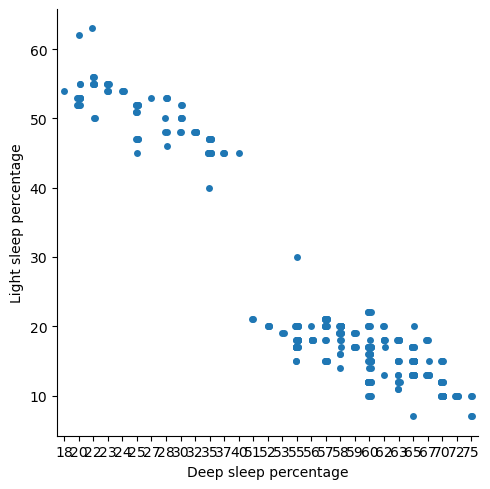

In [36]:
sns.catplot(x='Deep sleep percentage',y='Light sleep percentage',data=data_r3)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


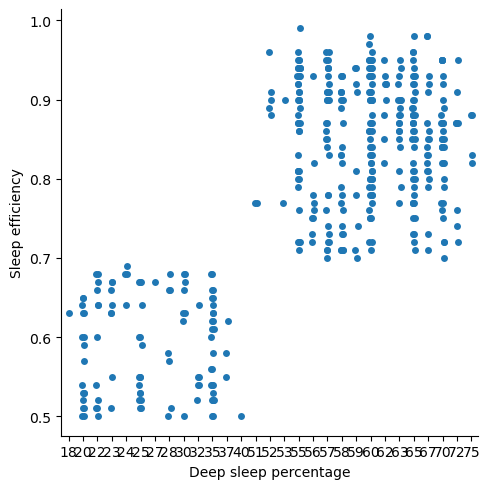

In [38]:
sns.catplot(x='Deep sleep percentage',y='Sleep efficiency',data=data_r3)

Text(0.5, 0, 'Deep sleep percentage')

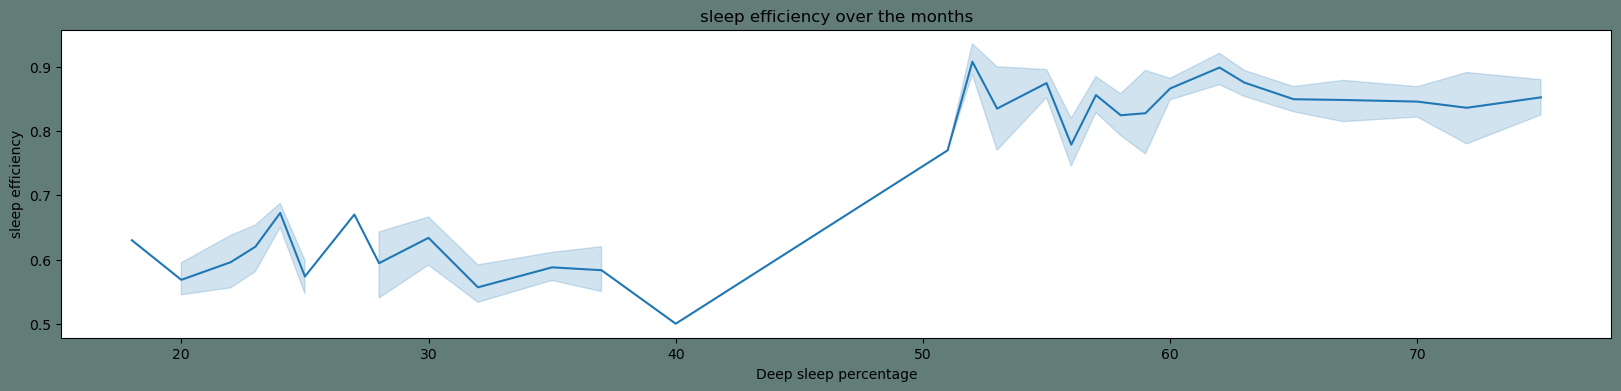

In [39]:
data_show = data_r3.copy()

plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=data_show['Deep sleep percentage'],y="Sleep efficiency",data=data_show)
Time_series.set_title("sleep efficiency over the months")
Time_series.set_ylabel("sleep efficiency")
Time_series.set_xlabel("Deep sleep percentage")

## Model conception (Model)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

### Dados de treino e de teste

In [41]:
X = data_r3.drop(['Sleep efficiency'], axis=1)
y = data_r3['Sleep efficiency']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


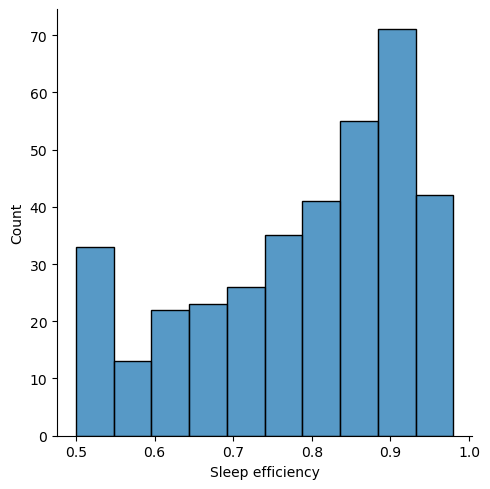

In [43]:
sns.displot(y_train)

/home/rui/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


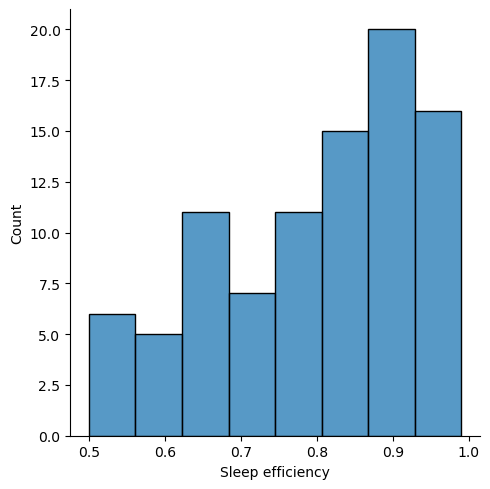

In [44]:
sns.displot(y_test)

### Linear Regression

In [45]:
lr = LinearRegression()
scores = cross_val_score(lr,X,y,cv=25,scoring='r2')
print(scores)
print(scores.mean())

[0.91857299 0.88716065 0.56867671 0.7309222  0.56134178 0.71546084
 0.79510248 0.79212462 0.79013352 0.87179075 0.72753066 0.68021516
 0.76602589 0.77237064 0.76839875 0.82540615 0.50564008 0.77710171
 0.78106249 0.76220121 0.61547539 0.82424181 0.71088969 0.87243077
 0.82265496]
0.7537172761686256


In [46]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
lr.intercept_

0.74046330841165

In [48]:
predictions = lr.predict(X_test)

In [50]:
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

MAE: 0.049078452349909506
MSE: 0.003567807295346487
RMSE: 0.059731125013233154


In [51]:
r2score = lr.score(X_test, y_test)
print(f'R-squared score: {r2score}')

R-squared score: 0.7890753858839821


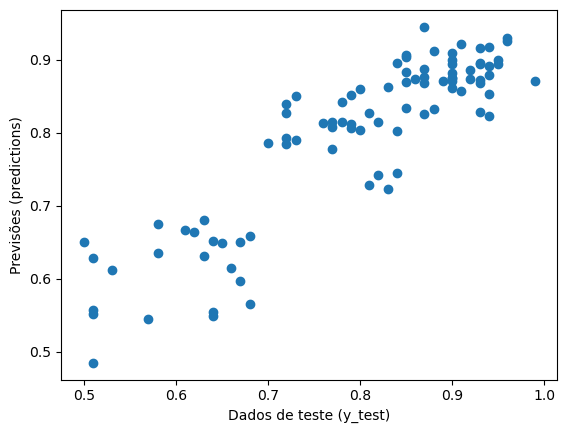

In [52]:
plt.xlabel('Dados de teste (y_test)')
plt.ylabel('Previsões (predictions)')
plt.scatter(y_test,predictions)

## Model evaluation (Assess)